# Claude Sonnet 3.5 V2 with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using Claude Sonnet 3.5 V2 with prompt from 2/13/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import claude_instructions_v213
MODEL_ID = "anthropic.claude-3-5-sonnet-20241022-v2:"
SYSTEM_PROMPT = claude_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:httpx:HTTP Request: POST https://bedrock-runtime.us-west-2.amazonaws.com/model/anthropic.claude-3-5-sonnet-20241022-v2:0/invoke "HTTP/1.1 200 OK"
INFO:root:Completed: 4
INFO:httpx:HTTP Request: POST https://bedrock-runtime.us-west-2.amazonaws.com/model/anthropic.claude-3-5-sonnet-20241022-v2:0/invoke "HTTP/1.1 200 OK"
INFO:root:Completed: 3
INFO:httpx:HTTP Request: POST https://bedrock-runtime.us-west-2.amazonaws.com/model/anthropic.claude-3-5-sonnet-20241022-v2:0/invoke "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:httpx:HTTP Request: POST https://bedrock-runtime.us-west-2.amazonaws.com/model/anthropic.claude-3-5-sonnet-20241022-v2:0/invoke "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:httpx:HTT

CPU times: user 49 s, sys: 5.67 s, total: 54.6 s
Wall time: 15min 26s


[{'0005.91306_cites_88693.txt': {'model': 'claude-3-5-sonnet-20241022',
   'input_tokens': 2545,
   'output_tokens': 104,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': "The passage discusses and clarifies the Target Case's holding but does not overrule it. Rather, it reaffirms and explains the previous ruling, stating 'we have not held that such a repealing act was absolutely void.' There are no Explicit or Implicit Negative Actions taken against the Target Case.",
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The passage discusses and clarifies the Target Case\'s holding but does not overrule it. Rather, it reaffirms and explains the previous ruling, stating \'we have not held that such a repealing act was absolutely void.\' There are no Explicit or Implicit Negative Actions taken against the Target Case."\n}\n```'}},
 {'0004.91306_cites_88240.txt': {'model': 'claude-3-5-sonnet-20241022',
   'input_tokens': 2540,
   'output

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0005.91306_cites_88693.txt,claude-3-5-sonnet-20241022,2545,104,no,0.95,The passage discusses and clarifies the Target...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0004.91306_cites_88240.txt,claude-3-5-sonnet-20241022,2540,106,no,0.95,The passage discusses the Target Case (Texas v...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,claude-3-5-sonnet-20241022,2574,110,no,0.95,The passage actually reaffirms and repeats the...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0001.91306_cites_88061.txt,claude-3-5-sonnet-20241022,3376,102,yes,0.95,The passage explicitly states that the Target ...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
4,0002.91306_cites_88994.txt,claude-3-5-sonnet-20241022,3057,120,no,0.95,The passages discuss and analyze the Target Ca...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/1.claude/2.sonnet3.5v2_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

0

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/1.claude/2.sonnet3.5v2_v213_prompt.csv")

In [8]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [9]:
assert len(df) == len(prediction_df)

In [10]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,claude-3-5-sonnet-20241022,3376,102,yes,0.95,The passage explicitly states that the Target ...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,claude-3-5-sonnet-20241022,3057,120,no,0.95,The passages discuss and analyze the Target Ca...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,claude-3-5-sonnet-20241022,2574,110,no,0.95,The passage actually reaffirms and repeats the...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,claude-3-5-sonnet-20241022,2540,106,no,0.95,The passage discusses the Target Case (Texas v...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,claude-3-5-sonnet-20241022,2545,104,no,0.95,The passage discusses and clarifies the Target...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [11]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [12]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["prediction"].value_counts()

prediction
no     923
yes    161
Name: count, dtype: int64

In [14]:
eval_df["input_tokens"].sum()

4094894

In [15]:
eval_df["output_tokens"].sum()

126942

In [16]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [17]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.97      0.95      0.96       935
         Yes       0.73      0.79      0.75       149

    accuracy                           0.93      1084
   macro avg       0.85      0.87      0.86      1084
weighted avg       0.93      0.93      0.93      1084



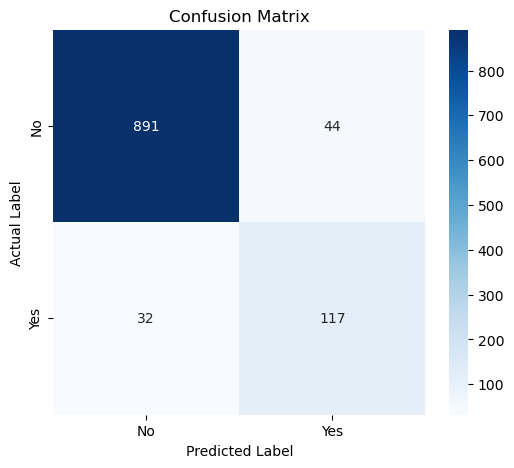

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.93
Precision: 0.73
Recall: 0.79
F-score: 0.75
Specificity: 0.95
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 117
True negatives: 891
False positives: 44
False negatives: 32


In [20]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

44

In [21]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

31

# Save the evaluation df

In [22]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,claude-3-5-sonnet-20241022,3376,102,yes,0.95,The passage explicitly states that the Target ...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,claude-3-5-sonnet-20241022,3057,120,no,0.95,The passages discuss and analyze the Target Ca...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,claude-3-5-sonnet-20241022,2574,110,no,0.95,The passage actually reaffirms and repeats the...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,claude-3-5-sonnet-20241022,2540,106,no,0.95,The passage discusses the Target Case (Texas v...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,claude-3-5-sonnet-20241022,2545,104,no,0.95,The passage discusses and clarifies the Target...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [23]:
eval_df.to_csv("predictions/1.claude/2.sonnet3.5v2_v213_prompt_eval.csv", index=False)